In [19]:
import pandas as pd
# Taken & PCA
# raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')

# Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')

# HRV+localPHI
raw_df = pd.read_csv('./features_data_resample/HRV_all.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_all_label.csv')
subject_id = pd.read_csv('./features_data_resample/subjectId.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape, subject_id.shape)

(11639, 1) (11639, 149) (11639, 1)


In [20]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
import numpy as np
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
    return confusion_matrix

def cal_confmatrix(n_range,y_true,y_pred):
    cm  = np.zeros([n_range,n_range])
    for i in range(1,n_range+1):
        for j in range(1,n_range+1):
            cm[i-1,j-1] += sum((y_true == i) & (y_pred == j))
    return cm


In [22]:
N = int(subject_id.max())
CM = np.zeros([4,4])
for i in range(1,N+1):
    sub_id = (subject_id['1'] == i) # The ['1'] is to select first column so that the range will be a series not df
    X_test = X[sub_id]
    X_train = X[~sub_id]
    y_test = y[sub_id].values.flatten() # The Model expect 1d array
    y_train = y[~sub_id].values.flatten()
    model = lgb.LGBMClassifier(objective = 'binary',
                               learning_rate = 0.02,
                               n_estimators = 3000,
                               random_state = 0,
#                                num_leaves = 2000,
#                                feature_fraction = gridsearch.best_params_['feature_fraction'], 
#                                bagging_fraction = gridsearch.best_params_['bagging_fraction'],
#                                max_depth = 12,
#                                lambda_l1 = gridsearch.best_params_['lambda_l1'],
#                                lambda_l2 = gridsearch.best_params_['lambda_l2'],
#                                min_split_gain = gridsearch.best_params_['min_split_gain'],
#                                min_child_weight = gridsearch.best_params_['min_child_weight']
                              )
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, pred))
    CM += cal_confmatrix(4 ,y_test,pred)

Accuracy: 0.4148936170212766
Accuracy: 0.26096997690531176
Accuracy: 0.43575418994413406
Accuracy: 0.5595854922279793
Accuracy: 0.6749311294765841
Accuracy: 0.26006191950464397
Accuracy: 0.5294117647058824
Accuracy: 0.6120996441281139
Accuracy: 0.5351239669421488
Accuracy: 0.7
Accuracy: 0.40939597315436244
Accuracy: 0.47002398081534774
Accuracy: 0.4677871148459384
Accuracy: 0.5352697095435685
Accuracy: 0.4970588235294118
Accuracy: 0.5306553911205074
Accuracy: 0.5198675496688742
Accuracy: 0.5912408759124088
Accuracy: 0.4708029197080292
Accuracy: 0.4915254237288136
Accuracy: 0.3793859649122807
Accuracy: 0.4629156010230179
Accuracy: 0.42036553524804177
Accuracy: 0.4709897610921502
Accuracy: 0.48756218905472637
Accuracy: 0.4929078014184397
Accuracy: 0.5756756756756757
Accuracy: 0.5373134328358209
Accuracy: 0.35126050420168065
Accuracy: 0.5756172839506173


In [23]:
print('Acc = ', sum(np.diag(CM))/sum(sum(CM)))
stat = np.zeros([3,4])
for i in range(4):
    stat[0,i] = CM[i,i]/sum(CM[:,i])
    stat[1,i] = CM[i,i]/sum(CM[i,:])
    stat[2,i] = 2*stat[0,i]*stat[1,i]/(stat[0,i]+stat[1,i])
    
macroF1 = sum(stat[2,:])/4
print('macroF1 = ', macroF1)

Acc =  0.48492138499871124
macroF1 =  0.4253346354908655


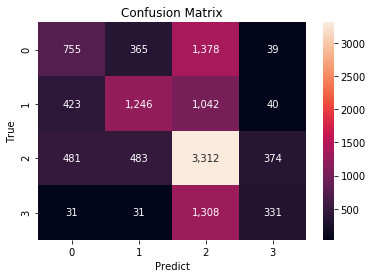

In [24]:
plot = sns.heatmap(CM, annot=True, fmt=',.0f')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
np.transpose(stat)

array([[0.44674556, 0.29759559, 0.35722735],
       [0.58635294, 0.45292621, 0.51107465],
       [0.47045455, 0.71225806, 0.56663815],
       [0.42219388, 0.19459142, 0.26639839]])

# Original Code

In [26]:
# # Leave-one-out cross validation cutting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# print('X_train:', X_train.shape)
# print('X_test:', X_test.shape)

In [27]:
# import lightgbm as lgb
# model = lgb.LGBMClassifier(is_unbalance=True)
# model.fit(X_train,y_train)

In [28]:
# from sklearn.metrics import accuracy_score
# pred=model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, pred))

In [29]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(actual_val, pred_val, title=None):
    # confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   # rownames=['Actual'],
                                   # colnames=['Predicted'])
    
    # plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    # if title is None:
        # pass
    # else:
        # plot.set_title(title)
        
    # plt.show()
    # return confusion_matrix

In [30]:
# import numpy as np
# q = np.array(y_test)
# q = q.reshape((-1,))
# print(q.shape)
# print(pred.shape)

In [31]:
# plot_confusion_matrix(q, pred)